
### Setup (10 minutes)

You will start working on Tasks 3-5 at 9.10am. Spend the 10 minutes for the setup to:

1. Replace CID in the file name with your CID, e.g. 123456_Coursework2_Part2.ipynb
2. Read and execute the following sections:

- **[S1](#s1). Package Imports** <a name="index-s1"></a>
- **[S2](#s2). Queries on Documentation** <a name="index-s2"></a>
- **[S3](#s3). Dataset Loading** <a name="index-s3"></a>



<a name="s1"></a>

## S1. Package Imports [(index)](#index-s1)

In [1]:
# Required imports - please stick to these imports only

import numpy as np
import matplotlib.pyplot as plt


# Initial global plotting configuration
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<a name="s2"></a>

## S2. Queries on Documentation [(index)](#index-s2)

Documentation of common Python libraries (*e.g.*, np.linalg.eig) can be accessed locally quicker than using the Web by executing the following expression in an arbitrary cell.

```python
?np.linalg.eig # this will display the documentation. Press [x] button to close the documentation dialogue.
```

In [2]:
# Example: uncomment the line below (CTRL+/) and execute (SHIFT+Enter)
# to get the documentation of `np.linalg.eig` function for Eigen decomposition.
# Press the [x] button to close the documentation dialogue.

# ?np.linalg.eig

<a name="s3"></a>

## S3. Dataset Loading [(index)](#index-s3)

#### Dataset (just for reference, same as in Part 1)
> In this coursework, you will work with a dataset of images of stars measured with the Euclid telescope of the European Space Agency. The training dataset comprises 648 images of stars (32 x 32 pixels) and the test set includes 32 images of stars (32 x 32 pixels). The stars in the dataset belong to four stellar classes: O5V, A0V, F5V and M5V. The first letter in the code denotes the spectral type (from hottest to coolest: O, B, A, F, G, K, M); the second digit represents the spectral subtype (from hottest to coolest: 1-9); the third letter V indicates that all the stars in our dataset are dwarf stars.

> The high-quality embeddings are 180-dimensional vectors, one for each star image, that were computed using a deep neural network able to classify images into the 4 classes with high accuracy.

####  In the next cell, the dataset is loaded for you into the following arrays:

- `star_images_train`: `(N, 32, 32)` array containing `N`=648 images of size of 32x32 each, to use for training.
- `star_embeddings_train`: `(N, p)` array containing `N`=648 embeddings (each with `p`=180 dimensions), one for each training sample in `star_images_train`.
- `star_classes_train`: `(N,)` array containing `N`=648 integer labels (the star image class, with number of classes `n_classes` = 4), one label for each training sample.


- `star_images_test`: `(N, 32, 32)` array containing `N`=32 images of size of 32x32 each, to use for testing.
- `star_embeddings_test`: `(N, p)` array, containing `N`=32 embeddings (each with `p`=180 dimensions), one for each test sample in `star_images_test`.
- `star_classes_test`: `(N,)` array containing `N`=32 class labels, one for each test sample.

In [3]:
def load_data(path):
    BASE_URL = "https://github.com/barahona-research-group/mfds-resources/raw/main/datasets/cw2/data"
    return np.load(np.DataSource().open(f"{BASE_URL}/{path}.npy").name)

star_images_train = load_data("training/star_images_train")
star_embeddings_train = load_data("training/star_embeddings_train")
star_classes_train = load_data("training/star_classes_train")

star_images_test = load_data("test/star_images_test")
star_embeddings_test = load_data("test/star_embeddings_test")
star_classes_test = load_data("test/star_classes_test")



## Coursework 2 Part 2 (90 minutes)

###  Tasks Outline

- [Task 3](#task-3): k-means clustering (20 marks) <a name="index-task-3"></a>
  - [(3.1)](#task-31) <a name="index-task-31"></a>
  - [(3.2)](#task-32) <a name="index-task-32"></a>
  - [(3.3)](#task-33) <a name="index-task-33"></a>
- [Task 4](#task-4): Gaussian Naive Bayes Classifier (15 marks) <a name="index-task-4"></a>
  - [(4.1)](#task-41) <a name="index-task-41"></a>
  - [(4.2)](#task-42) (3rd-year students only)  <a name="index-task-42"></a>
  - [(4.2)](#task-42m)  (MSc/4th-year students only) <a name="index-task-42m"></a>
- [Task 5](#task-5): Soft-margin linear SVM classifier (15 marks) <a name="index-task-5"></a>
  - [(5.1)](#task-51) <a name="index-task-51"></a>
  - [(5.2)](#task-52) (3rd-year students only) <a name="index-task-52"></a>
  - [(5.2)](#task-52m) (MSc/4th-year students only) <a name="index-task-52m"></a>

If you have troubles visualising the text and the images describing the tasks, you can download a PDF with the tasks' description at this [link](https://drive.google.com/file/d/1RZd_9NssPKGHNr0WxEVm0o97to6ETq1D/view?usp=sharing).

Recommendation: if there are tasks where you get stuck, try to carry on as much as you can with the following tasks.

<a name="task-3"></a>

## Task 3:   k-means clustering (15 marks) [(index)](#index-task-3)


<a name="task-31"></a>

### **3.1 (8 marks)**   [(index)](#index-task-31)


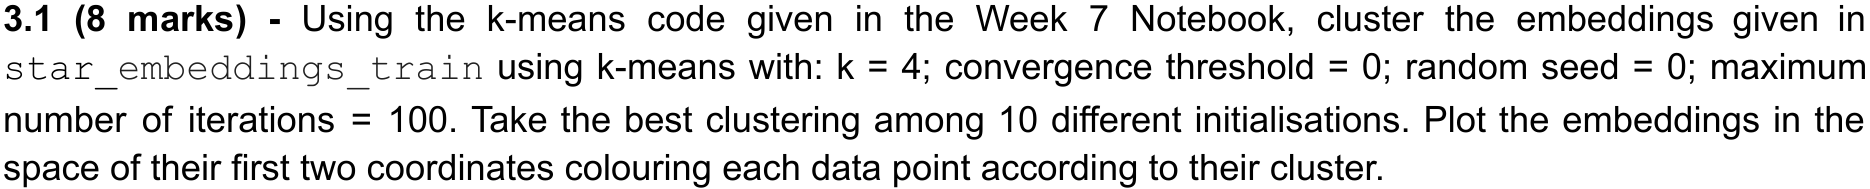

In [4]:
def compute_within_distance(centroids, X, labels):
    """
    Compute the within-cluster distance.

    Args:
        centroids (np.ndarray): the centroids array, with shape (k, p).
        X (np.ndarray): the samples array, with shape (N, p).
        labels (np.ndarray): the cluster index of each sample, with shape (N,).

    Retruns:
        (float): the within-cluster distance.
    """
    within_distance = 0.0
    k, p = centroids.shape

    for l in range(len(centroids)):
        centroid = centroids[l]
        # Applying aggregate computations on `NaN` values
        # can propagate the `NaN` to the results.
        # In this case we skip the `NaN` centroid,
        # which is effectively of an empty cluster.
        if np.isnan(centroid).any():
            continue

        # Select samples belonging to label=l.
        X_cluster = X[labels == l]

        # EDIT THE NEXT LINES
        # You need to add the `X_cluster` contribution to `within_distance`

        # 1. Compute the cluster contribution.
        cluster_se = (X_cluster - centroid)**2 # <-- SOLUTION
        assert cluster_se.shape == (len(X_cluster), p) # <-- SOLUTION
        # 2. Accumulate
        within_distance += np.sum(cluster_se) # <-- SOLUTION

    return within_distance


In [5]:
def compute_centroids(k, X, labels):
    """
    Compute the centroids of the clustered points X.

    Args:
        k (int): total number of clusters.
        X (np.ndarray): data points, with shape (N, p)
        labels (np.ndarray): cluster assignments for each sample in X, with shape (N,).

    Returns:
        (np.ndarray): the centroids of the k clusters, with shape (k, p).
    """
    N, p = X.shape

    centroids = np.zeros((k, p))

    # EDIT THE NEXT LINES
    for label in range(k):
        cluster_X_l = X[labels == label] # <-- SOLUTION
        centroids[label] = cluster_X_l.mean(axis=0) # <-- SOLUTION

    return centroids


In [6]:
def kmeans_assignments(centroids, X):
    """
    Assign every example to the index of the closest centroid.

    Args:
        centroids (np.ndarray): The centroids of the k clusters, shape: (k, p).
        X (np.ndarray): The samples array, shape (N, p).

    Returns:
        (np.ndarray): an assignment matrix to k clusters, by their indices.
    """
    k, p = centroids.shape
    N, _ = X.shape

    # Compute distances between data points and centroids. Assumed shape: (k, N).
    distances = np.vstack([np.linalg.norm(X - c, axis=1) for c in centroids]) # <-- SOLUTION
    # Note: If any centroid has NaN, the NaN value will propagate into the
    # distance corresponding row, we need to skip that row next when we search
    # for the closest centroid.

    assert distances.shape == (k, N), f"Unexpected shape {distances.shape} != {(k, N)}"
    # Assignments are computed by finding the centroid with the minimum distance
    # for each sample. The np.nanargmin returns the index of the minimum values
    # in `distances` scanning the rows (axis=0) for each column,
    # while skipping any nan value found.
    return np.nanargmin(distances, axis=0)



In [7]:
def kmeans_clustering(X, k,
                      max_iters=1000,
                      epsilon=0.0,
                      callback=None):
    """
    Apply k-means clustering algorithm on the samples in `X` to generate
    k clusters.

    Notes:
      The main steps followed here are described previously:
        1. randomly assignments of the points to $k$-clusters.
        2. compute the centroid of each of the $k$- clusters.
        3. reassign each point to the closest centroid.
        4. repeat steps (2) and (3) until:
            - assignments/labels do not change, or
            - the within-distance $W(C)$ converges with `epsilon` tolerence.
            - or the number of iterations exceeds `max_iters`.


    Args:
        X (np.ndarray): The samples array, shape: (N, p).
        k (int): The number of clusters.
        max_iters (int): Maximum number of iterations.
        epsilon (float): The minimum change in the within-distance to continue.
        callback (Callable): a function to be called on the assignments,
            the centroids, and within-distance after each iteration, default is None.

    Returns:
        Tuple[np.ndarray, np.ndarray]: the assignments array to k clusters with
            shape (N,) and the centroids array
    """
    # Step 1: randomly initialise the cluster assignments.
    labels = np.random.choice(k, size=len(X), replace=True) # <-- SOLUTION

    within_distance = np.inf

    for _ in range(max_iters):
        # Step 2: compute the centroids
        centroids = compute_centroids(k, X, labels) # <-- SOLUTION

        if callback:
            callback(labels, centroids)

        # Step 3: reassignments.
        new_labels = kmeans_assignments(centroids, X) # <-- SOLUTION

        _within_distance = compute_within_distance(centroids, X, labels)

        # Step 4: repeat (2) and (3) until a termination condition.
        if all(labels == new_labels) or abs(_within_distance - within_distance) < epsilon: # <-- SOLUTION
            break

        labels = new_labels
        within_distance = _within_distance


    return labels, centroids, within_distance


In [8]:
def kmeans_clustering_multi_runs(X, k, max_iters=100,
                                 epsilon=0.0,
                                 n_runs=100, seed=0):
    """
    Perform multiple runs (with different initialisations) of kmeans algorithm
    and return the best clustering using the within-cluster distance.

    Args:
        X (np.ndarray): The samples array, shape (N, p).
        k (int): The number of clusters.
        max_iters (int): Maximum iterations of kmeans algorithm.
        epsilon (float): The convergence threshold of kmeans algorithm.
        n_runs (int): The number of runs of kmeans with different initialisations.
        seed (int): A seed value before starting the n_runs loop.

    Returns:
        Tuple[np.ndarray, ...]: A tuple that encapsulates (labels, centroids,
        intermediate clustering, within-cluster distance) of the best clusetering
        that minimises the within-cluster distance along the n_runs.
    """
    # We fix the seed once before starting the n_runs.
    np.random.seed(seed)
    min_within_distance = np.inf
    best_clustering = (None, None, None)

    for _ in range(n_runs):
        intermediates = []
        # Our callback stores all the intermediate labels and centroids
        # in case we need them for debugging and visualisations.
        callback = lambda labels, centroids: intermediates.append((labels, centroids))

        labels, centroids, wd = kmeans_clustering(X, k=k, max_iters=max_iters,
                                                    epsilon=epsilon,
                                                    callback=callback) # <-- SOLUTION

        if wd < min_within_distance:
            best_clustering = labels, centroids, intermediates
            min_within_distance = wd

    labels, centroids, intermediates = best_clustering
    return labels, centroids, intermediates, wd

In [9]:
partition1, centroids_partition1, intermediates_partition1, wd_partition1 = kmeans_clustering_multi_runs(star_embeddings_train, k=4, max_iters=100, epsilon=0, n_runs=10, seed=0)

In [10]:
value_to_type = {0 : 'O5V', 1: 'A0V', 2 : 'F5V', 3 : 'M5V'}

colors_dict = {0: 'blue', 1: 'orange', 2: 'green', 3: 'red'}
color_type = [colors_dict[i] for i in star_classes_train]

NameError: name 'centroids' is not defined

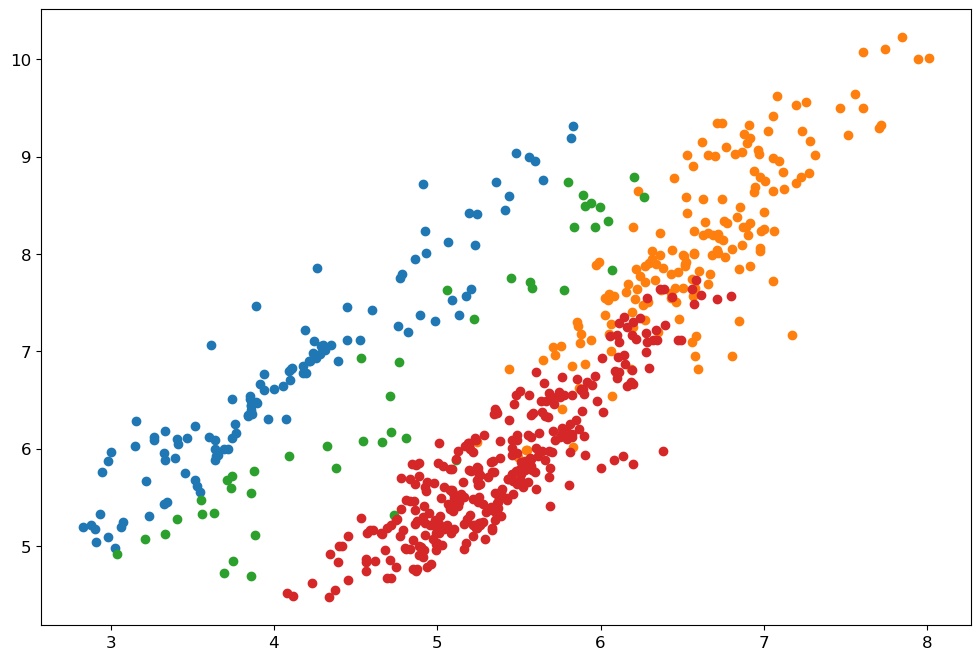

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.scatter(star_embeddings_train[partition1==0, 0], star_embeddings_train[partition1==0, 1], label=value_to_type[0])
ax.scatter(star_embeddings_train[partition1==1, 0], star_embeddings_train[partition1==1, 1], label=value_to_type[1])
ax.scatter(star_embeddings_train[partition1==2, 0], star_embeddings_train[partition1==2, 1], label=value_to_type[2])
ax.scatter(star_embeddings_train[partition1==3, 0], star_embeddings_train[partition1==3, 1], label=value_to_type[3])

ax.set_title(f'Clustering (k={len(centroids)})')
ax.set_xticklabels([]); ax.set_yticklabels([]);
ax.set_xlabel('X1'); ax.set_ylabel('X2');

plt.legend(title='Clusters')

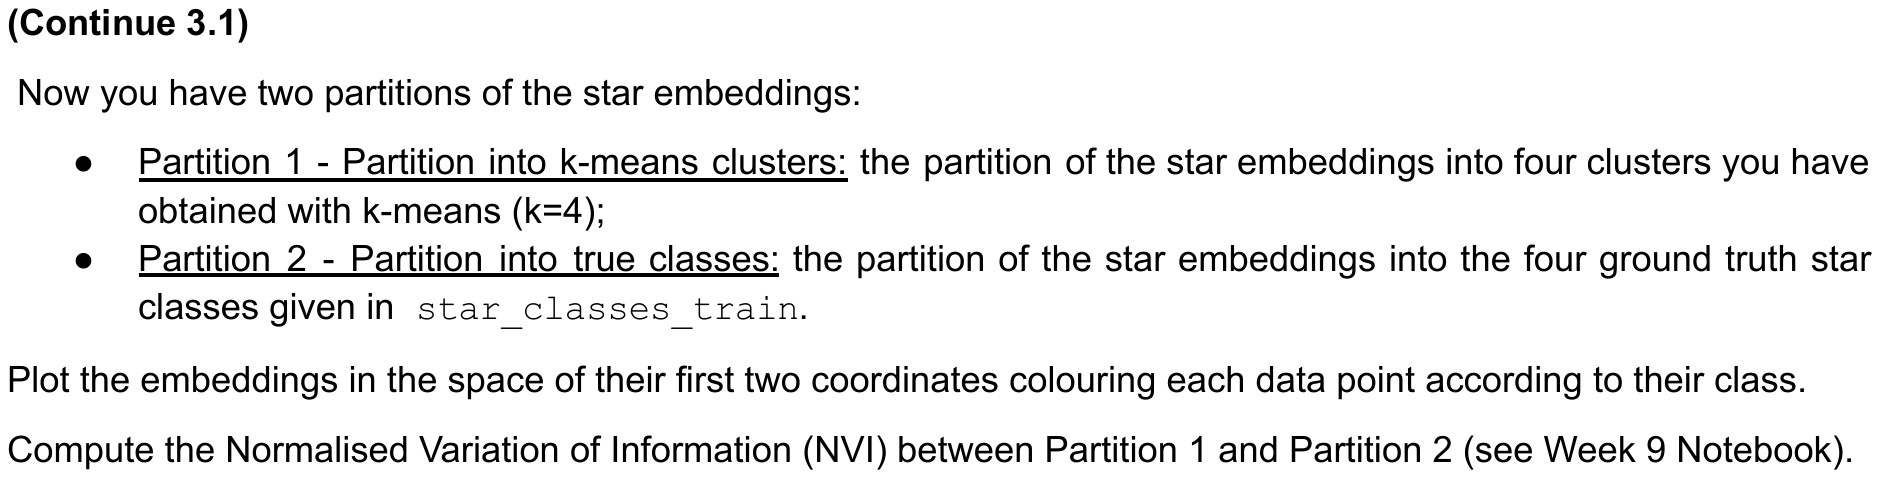

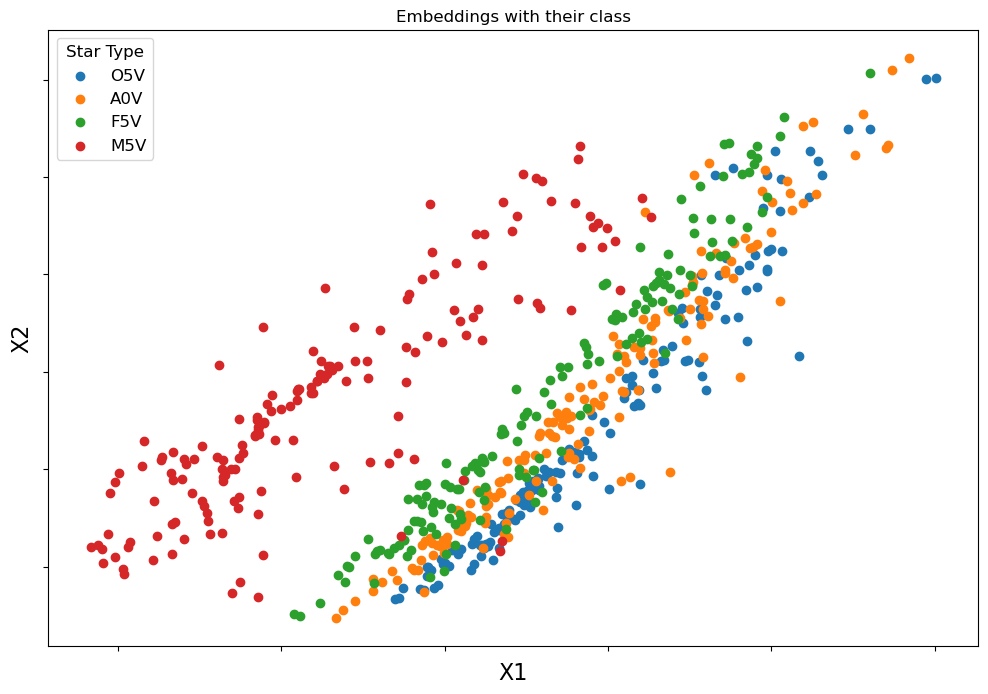

In [12]:
partition2 = star_classes_train

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.scatter(star_embeddings_train[star_classes_train==0, 0], star_embeddings_train[star_classes_train==0, 1], label=value_to_type[0])
ax.scatter(star_embeddings_train[star_classes_train==1, 0], star_embeddings_train[star_classes_train==1, 1], label=value_to_type[1])
ax.scatter(star_embeddings_train[star_classes_train==2, 0], star_embeddings_train[star_classes_train==2, 1], label=value_to_type[2])
ax.scatter(star_embeddings_train[star_classes_train==3, 0], star_embeddings_train[star_classes_train==3, 1], label=value_to_type[3])

ax.set_title(f'Embeddings with their class')
ax.set_xticklabels([]); ax.set_yticklabels([]);
ax.set_xlabel('X1'); ax.set_ylabel('X2');

plt.legend(title='Star Type')

At first sight, we would say that our previous k-means partition is very far from the true partition. Actually, all four clusters have not been well identified by k-means. Let's analysis how far our k-means partition is from the true partition, using NVI.  

In [13]:
def compute_NVI(partition_1,partition_2):
    """Computes NVI of two partitions.

    Parameters:
        partition_1 (np.array): Encoding for partition 1.
        partition_2 (np.array): Encoding for partition 2.

    Returns:
        NVI (float): NVI of the two partitions.
    """
    # check if partitions are defined on the same underlying space
    assert len(partition_1) == len(partition_2), "Partition arrays must have same length"

    # get number of points
    N = len(partition_1)

    # get communities as sets from partition 1
    communities_1 = []
    for index in np.unique(partition_1):
        community = set(np.where(partition_1==index)[0])
        communities_1.append(community)

    # get communities as sets from partition 2
    communities_2 = []
    for index in np.unique(partition_2):
        community = set(np.where(partition_2==index)[0])
        communities_2.append(community)

    # compute number of communities
    n1 = len(communities_1)
    n2 = len(communities_2)

    # compute probabilities for the two partitions
    p1 = np.asarray([len(community) for community in communities_1]) / N        # <-- SOLUTION
    p2 = np.asarray([len(community) for community in communities_2]) / N        # <-- SOLUTION

    # compute joint probabilities
    p12 = np.zeros((n1,n2))
    for i in range(n1):
        for j in range(n2):
            p12[i,j] = len(communities_1[i].intersection(communities_2[j]))/N   # <-- SOLUTION

    # compute entropy
    E1 = - np.sum(p1 * np.log(p1))
    E2 = - np.sum(p2 * np.log(p2))

    # compute mutual information
    MI = 0
    for i in range(n1):
        for j in range(n2):
            if p12[i,j] > 0:
                MI += p12[i,j] * np.log(p12[i,j]/(p1[i]*p2[j]))

    # compute NVI
    NVI = (E1 + E2 - 2 * MI) / (E1 + E2 - MI)

    return NVI


In [14]:
print("NVI of partition1 and partition2:", round(compute_NVI(partition1,partition2),3))

NVI of partition1 and partition2: 0.729


A NVI of 0.729 is pretty low, which confirms that our k-means partition is not very similar to the true partition, as expected.

<a name="task-32"></a>

### **3.2 (7 marks)**   [(index)](#index-task-32)


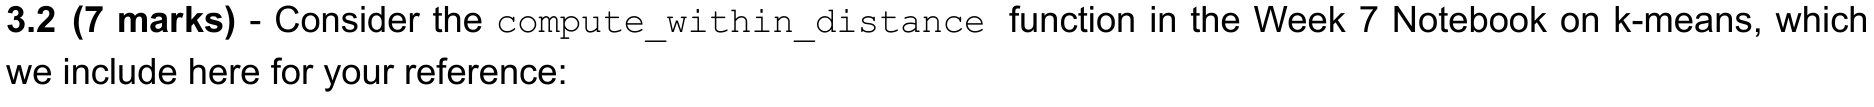

In [15]:
def compute_within_distance(centroids, X, labels):
    """
    Compute the within-cluster distance.

    Args:
        centroids (np.ndarray): the centroids array, with shape (k, p).
        X (np.ndarray): the samples array, with shape (N, p).
        labels (np.ndarray): the cluster index of each sample, with shape (N,).

    Returns:
        (float): the within-cluster distance.
    """
    within_distance = 0.0
    k, p = centroids.shape

    for l in range(len(centroids)):
        centroid = centroids[l]
        # Applying aggregate computations on `NaN` values
        # can propagate the `NaN` to the results.
        # In this case we skip the `NaN` centroid,
        # which is effectively of an empty cluster.
        if np.isnan(centroid).any():
            continue

        # Select samples belonging to label=l.
        X_cluster = X[labels == l]

        # You need to add the `X_cluster` contribution to `within_distance`

        # 1. Compute the cluster contribution.
        cluster_se = (X_cluster - centroid)**2
        assert cluster_se.shape == (len(X_cluster), p)
        # 2. Accumulate
        within_distance += np.sum(cluster_se)

    return within_distance

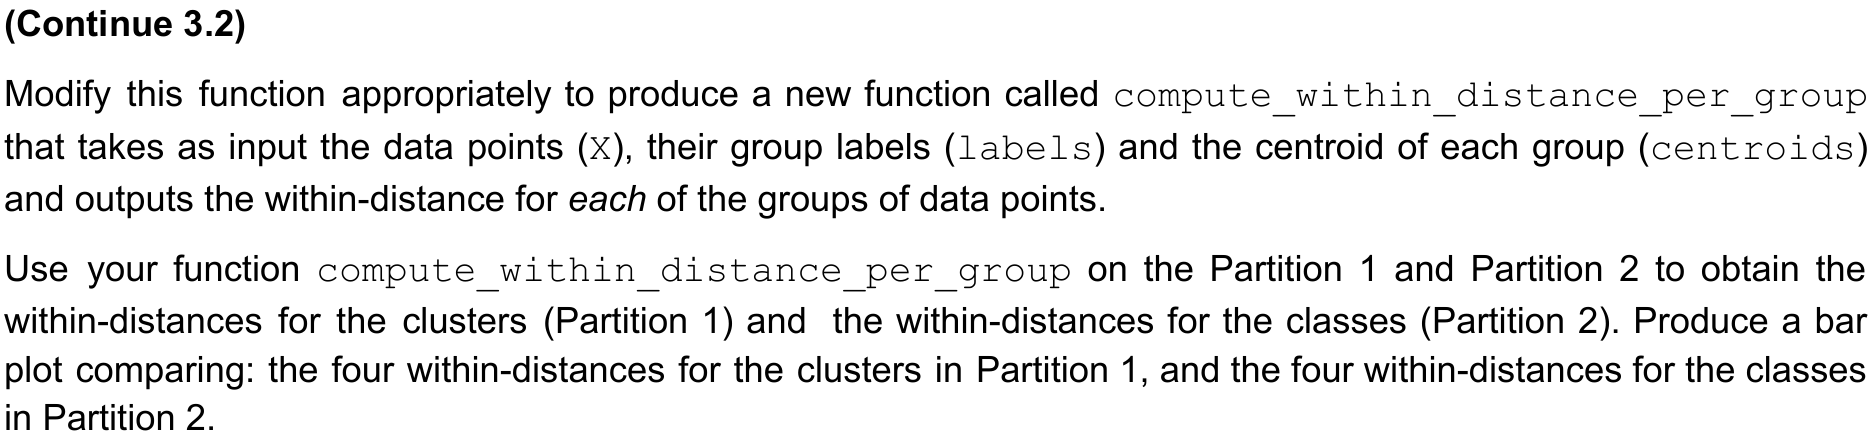

In [16]:
def compute_within_distance_per_group(centroids, X, labels):
    """
    Compute the within-cluster distance.

    Args:
        centroids (np.ndarray): the centroids array, with shape (k, p).
        X (np.ndarray): the samples array, with shape (N, p).
        labels (np.ndarray): the cluster index of each sample, with shape (N,).

    Returns:
        (float): the within-cluster distance.
    """
    within_distance = np.zeros(len(centroids))
    k, p = centroids.shape

    for l in range(len(centroids)):
        centroid = centroids[l]
        # Applying aggregate computations on `NaN` values
        # can propagate the `NaN` to the results.
        # In this case we skip the `NaN` centroid,
        # which is effectively of an empty cluster.
        if np.isnan(centroid).any():
            continue

        # Select samples belonging to label=l.
        X_cluster = X[labels == l]

        # You need to add the `X_cluster` contribution to `within_distance`

        # 1. Compute the cluster contribution.
        cluster_se = (X_cluster - centroid)**2
        assert cluster_se.shape == (len(X_cluster), p)
        # 2. Accumulate
        within_distance[l] = np.sum(cluster_se)

    return within_distance

[13068.03719183 29057.84819963  8046.22051677 34527.27878372]
[31097.58856845 36066.6918253  32217.52583032 36058.51473357]


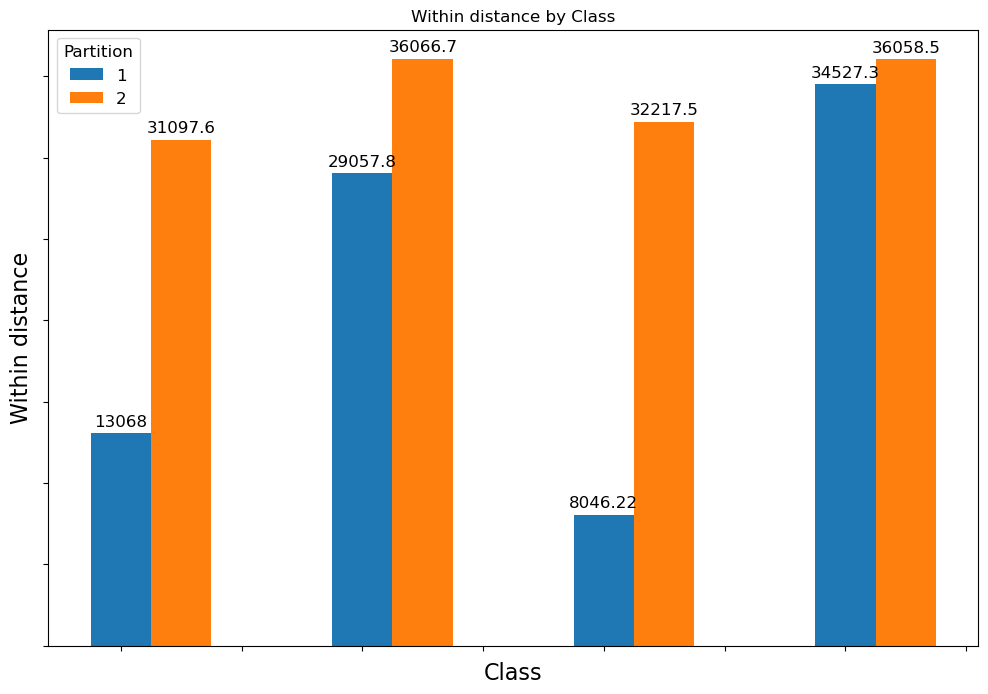

In [17]:
wd_partition1 = compute_within_distance_per_group(centroids_partition1, star_embeddings_train, partition1)

centroids_partition2 = compute_centroids(k=4, X=star_embeddings_train, labels=partition2)
wd_partition2 = compute_within_distance_per_group(centroids_partition2, star_embeddings_train, partition2)


print(wd_partition1)
print(wd_partition2)

classes = np.unique(partition2)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

rects = ax.bar(classes, wd_partition1, width=0.25, label='1')
ax.bar_label(rects, padding=3)

rects = ax.bar(classes + 0.25, wd_partition2, width=0.25, label='2')
ax.bar_label(rects, padding=3)


ax.set_title(f'Within distance by Class')
ax.set_xticklabels([]); ax.set_yticklabels([]);
ax.set_xlabel('Class'); ax.set_ylabel('Within distance');

plt.legend(title='Partition')

<a name="task-33"></a>

### **3.3 (5 marks)**   [(index)](#index-task-33)

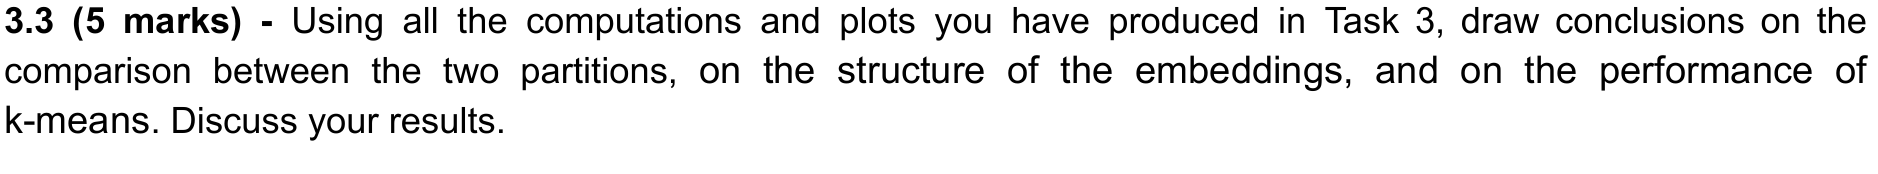

First of all, from _3.1_, we have deduced that our k-means clustering was pretty far from the truth. Indeed, comparing the two plots of the embeddings, we observed that the clusters from k-means were not representative of the true classes.  
Then, we evaluate, numerically the performance of our model, by compute the NVI between the obtained partition1 and the true partition2. It gave a NVI of 0.729, which is pretty low, suggesting that our model is not performant.  
Nonetheless, when looking at the within-cluster distances for both partitions, we notice that they are, in all classes, lower for the k-means partition1 than for the true partition. Hence, we could deduce that k-means did its job and produced logical clusters. Finally, we could probably say that k-means is not the right model to use here.



---



<a name="task-4"></a>

## Task 4:  Gaussian Naive Bayes classifier (15 marks) [(index)](#index-task-4)

<a name="task-41"></a>

### **4.1 (10 marks)**   [(index)](#index-task-41)


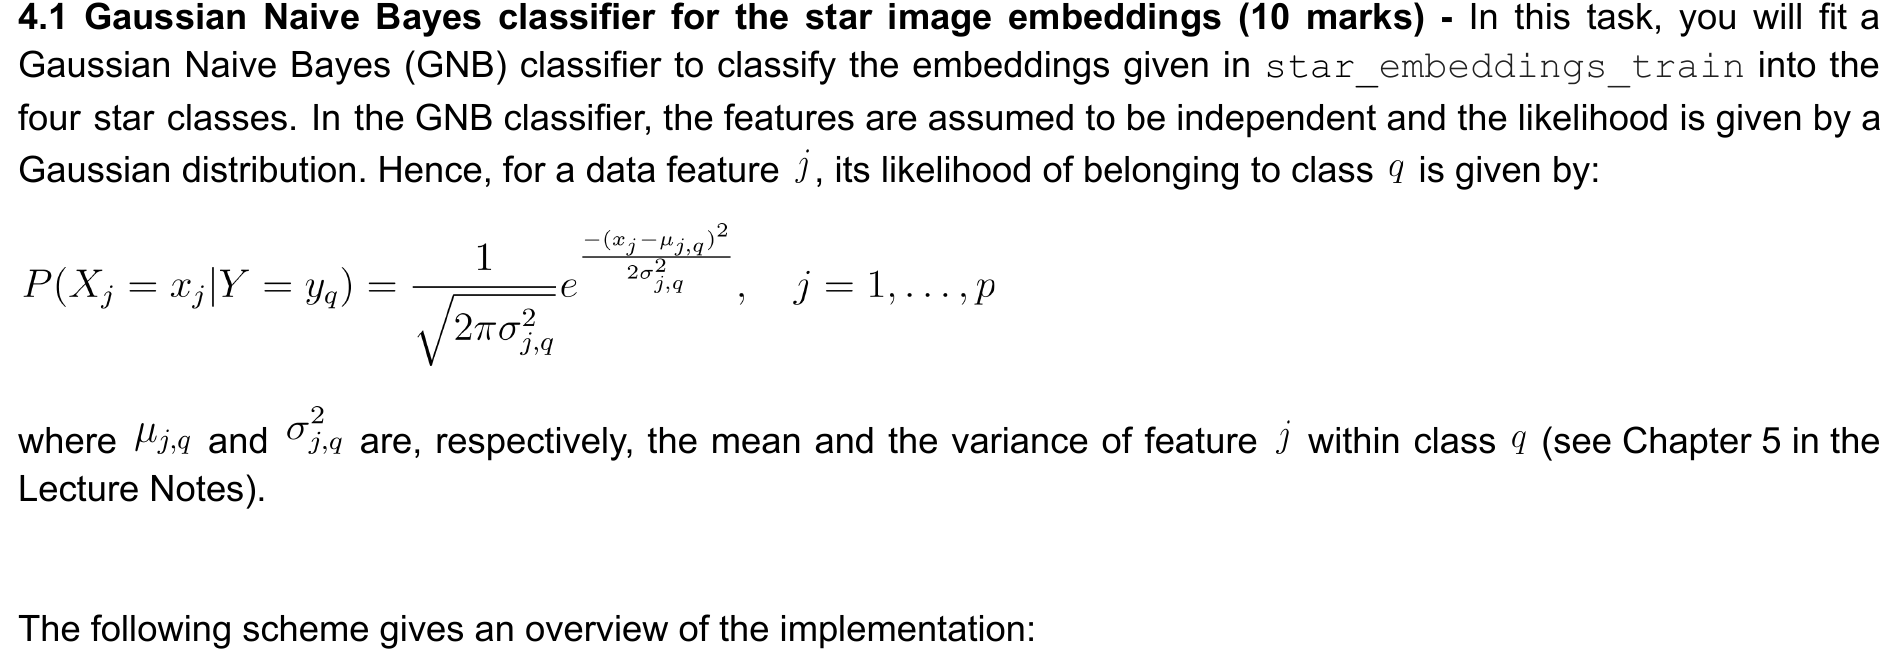

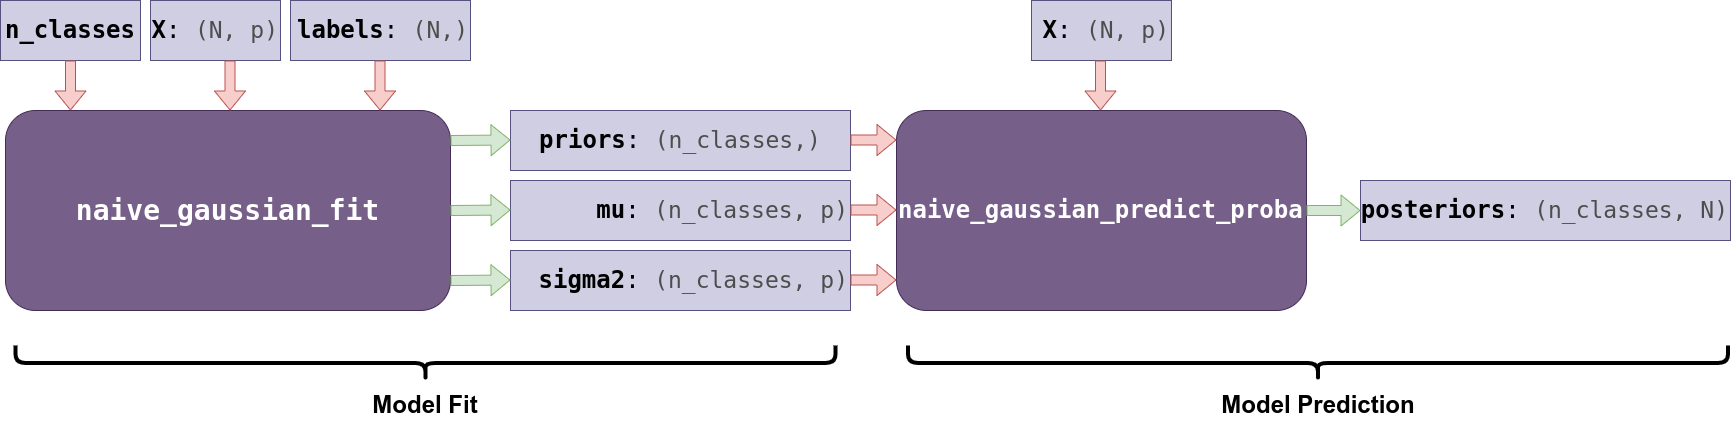

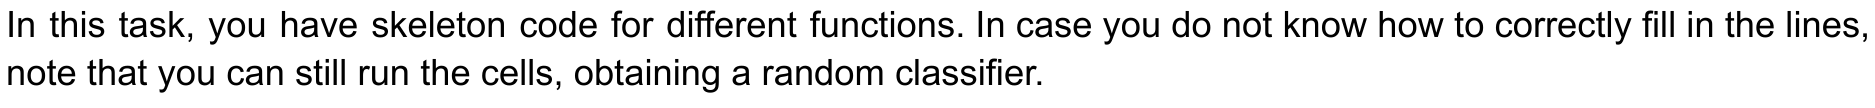


#### **4.1.1 (3 marks)**

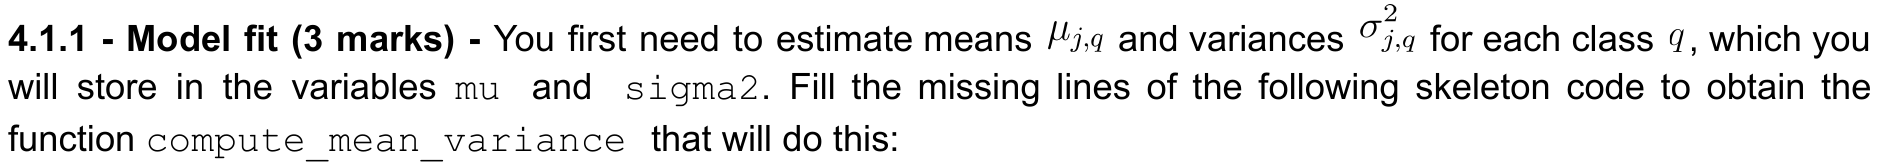

In [18]:
# EDIT THIS FUNCTION.
def compute_mean_variance(n_classes, X, labels):
    """
    Compute the mean and the variance of samples with respect to each class.

    Args:
        n_classes (int): total number of classes.
        X (np.ndarray): data points, with shape (N, p)
        labels (np.ndarray): class labels for each sample in X, with shape (N,),
            while each label value belongs to {0, 1, ..., n_classes - 1}.

    Returns:
        mu: the mean of the classes, with shape (n_classes, p).
        sigma2: the variance of the classes, with shape (n_classes, p).

    """
    N, p = X.shape

    mu = np.zeros((n_classes, p))
    sigma2 = np.ones((n_classes, p))

    for label in range(n_classes):
        X_c = X[labels == label]
        mu[label] = np.mean(X_c, axis=0)
        sigma2[label] = np.var(X_c, axis=0)

    return mu, sigma2

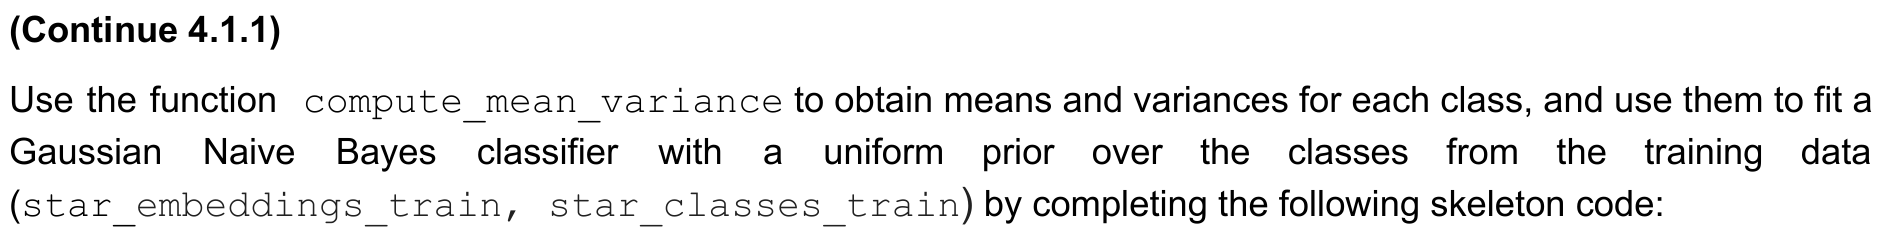

In [19]:
# EDIT THIS FUNCTION
def naive_gaussian_fit(n_classes, X, y):
    """Use training data to fit the Gaussian Naive Bayes classifier parameters.

    Args:
        n_classes (int): total number of classes.
        X (np.array): The samples array, shape: (N, p).
        y (np.array): Categorical target array, shape: (N, ). Each category value
            belongs to {0, 1, ..., n_classes - 1}.

    Returns:
        prior (np.array): Prior distribution of classes, shape: (n_classes, ).
        mu (np.ndarray): the mean for each class, shape: (n_classes, p)
        sigma2 (np.ndarray): the variance for each class, shape: (n_classes, p)
    """
    p = X.shape[1]

    # define prior
    prior = np.asarray([np.sum(y == c)/len(y) for c in np.unique(y)]) # <-- EDIT THIS LINE

    mu, sigma2 = compute_mean_variance(n_classes, X, y)

    return prior, mu, sigma2


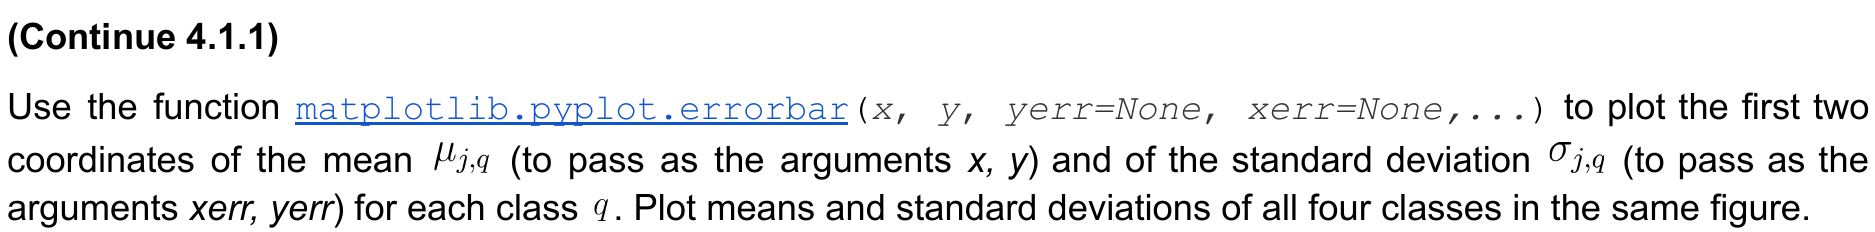

In [20]:
# uncomment the line below (CTRL+/) and execute (SHIFT+Enter) to get the documentation
#?plt.errorbar

<ErrorbarContainer object of 3 artists>

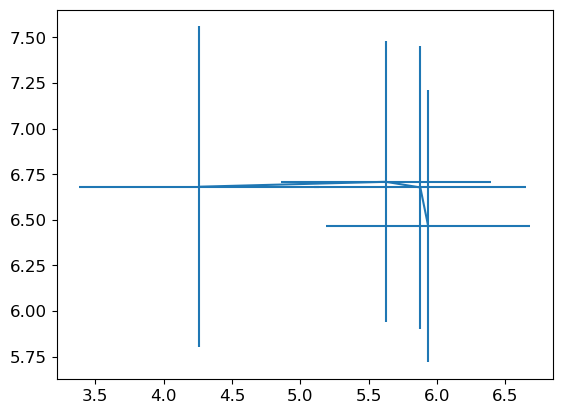

In [21]:
prior, mu, sigma2 = naive_gaussian_fit(n_classes=4, X=star_embeddings_train, y=star_classes_train)

plt.errorbar(x=mu[:, 0], y=mu[:, 1], xerr=np.sqrt(sigma2[:, 0]), yerr=np.sqrt(sigma2[:, 0]))

#### **4.1.2 (7 marks)**

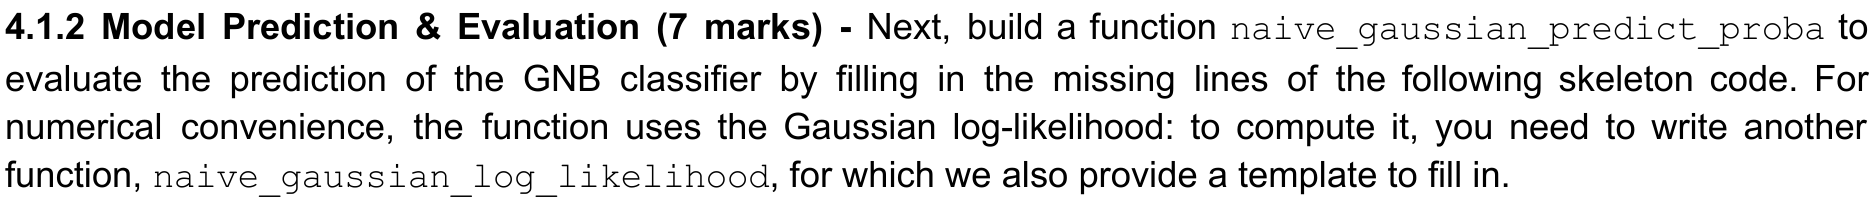

In [22]:

# EDIT THIS FUNCTION
def naive_gaussian_log_likelihood(X, mu_i, sigma2_i):
    """
    Compute the Gaussian log-likelihood for each multi-dimensional sample in X,
    with the naive assumption of independence across features (dimensions).

    Args:
        X (np.ndarray): the data array, shape: (N, p).
        mu_i (np.ndarray): the class mean, shape: (p, )
        sigma2_i (np.ndarray): the class variance, shape: (p, )

    Returns:
        (np.ndarray): the log-likelihood for each sample, shape: (N, ).
    """

    return np.sum(1/np.sqrt(2*np.pi*sigma2_i) * np.exp(- (X - mu_i)**2 / (2*sigma2_i)), axis=1) # <-- EDIT THIS LINE


# EDIT THIS FUNCTION
def naive_gaussian_predict_proba(prior, mu, sigma2, X):
    """Predict the posterior probabilities of the classes with the Gaussian Naive Bayes.

    Args:
        prior (np.array): Prior distribution of classes, shape: (n_classes, ).
        mu (np.ndarray): the mean for each class, shape: (n_classes, p)
        sigma2 (np.ndarray): the variance for each class, shape: (n_classes, p)
        X (np.array): The samples array, shape: (N, p).


    Returns:
        posteriors (np.array): Posterior distribution of samples, shape: (n_classes, N).
    """
    n_classes, N = len(prior), len(X)

    # define likelihood P(x|y) shape: (n_classes, N)
    log_lk = np.vstack([naive_gaussian_log_likelihood(X, mu_i, sigma2_i) for (mu_i, sigma2_i) in zip(mu, sigma2)])
    print(log_lk.shape)
    # compute log-posterior
    log_posterior = X @ log_lk.transpose() + np.log(prior) # <-- EDIT THIS LINE

    # to ensure numerical stability when computing the normalisation factor, we can subtract the maximum log posterior
    # this change will be re-absorbed into the normalisation factor without loss of generality
    log_posterior = log_posterior - log_posterior.max(axis=0)

    # normalize to get full posterior distribution
    normalize_term = np.exp(log_posterior).sum(axis=1).reshape(-1, 1) # <-- EDIT THIS LINE
    posteriors = np.exp(log_posterior) / normalize_term # <-- EDIT THIS LINE

    return posteriors

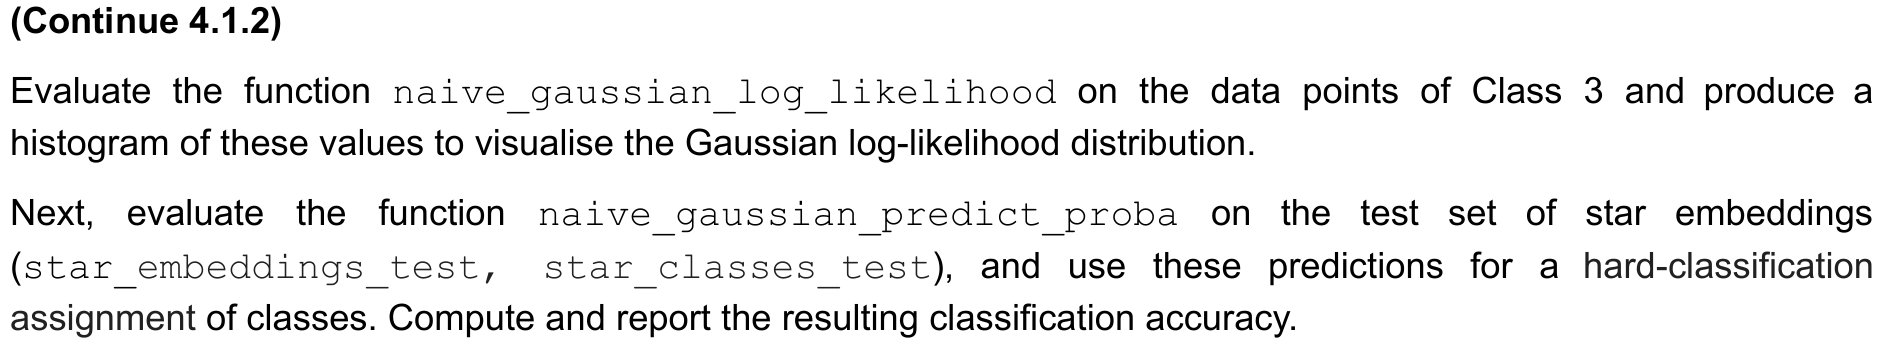

In [23]:
def predict(X, prior, mu, sigma2):
    """ Predict class with highest probability.

    Params:
      X (np.array): Features
      prior (np.array): Prior distribution of classes
      lk_word (np.array): Likelihood of words (features) to appear given class

    Returns:
      y_pred (np.array): Predicted target
    """

    # prediction given by argmax choice
    predicted_probabilities = naive_gaussian_predict_proba(prior, mu, sigma2, X) ## <-- SOLUTION
    y_pred = predicted_probabilities.argmax(axis=1)  ## <-- SOLUTION

    return y_pred

In [24]:
prior, mu, sigma2 = naive_gaussian_fit(n_classes=4, X=star_embeddings_train, y=star_classes_train)

y_pred = predict(star_embeddings_train, prior, mu, sigma2)
print('Performance is:', np.mean(y_pred == star_classes_train))

(4, 648)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 648 is different from 180)

<a name="task-42"></a>


### **4.2 (5 marks, 3rd-year students only)**   [(index)](#index-task-42)


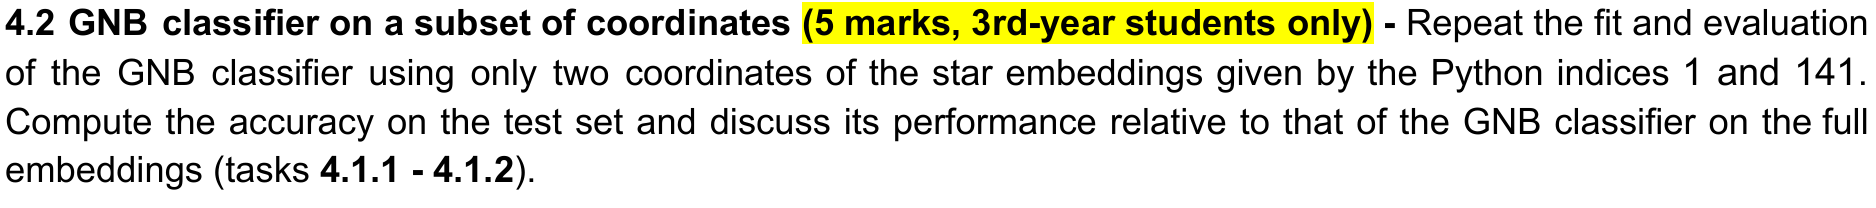

<a name="task-42m"></a>


### **4.2 (5 marks, MSc/4th-year students only)**   [(index)](#index-task-42m)

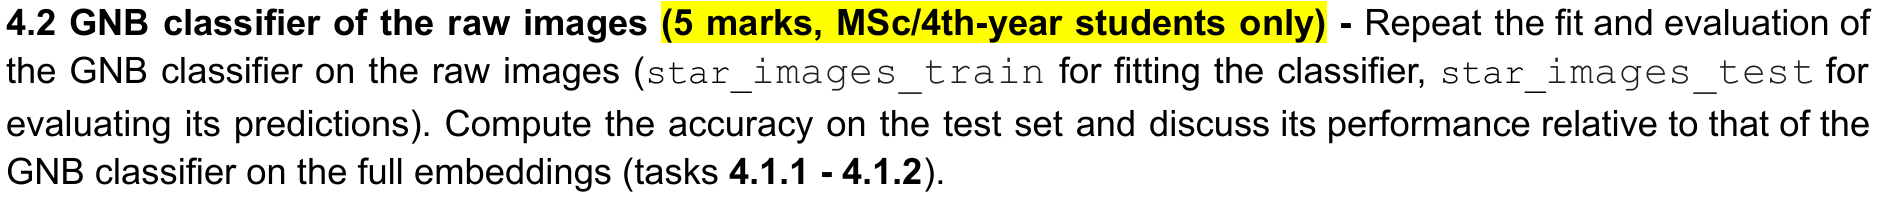



---



<a name="task-5"></a>

## Task 5:  Soft-margin linear Support Vector Machine (SVM) classifier (15 marks) [(index)](#index-task-5)

<a name="task-51"></a>

### **5.1 (10 marks)**   [(index)](#index-task-51)

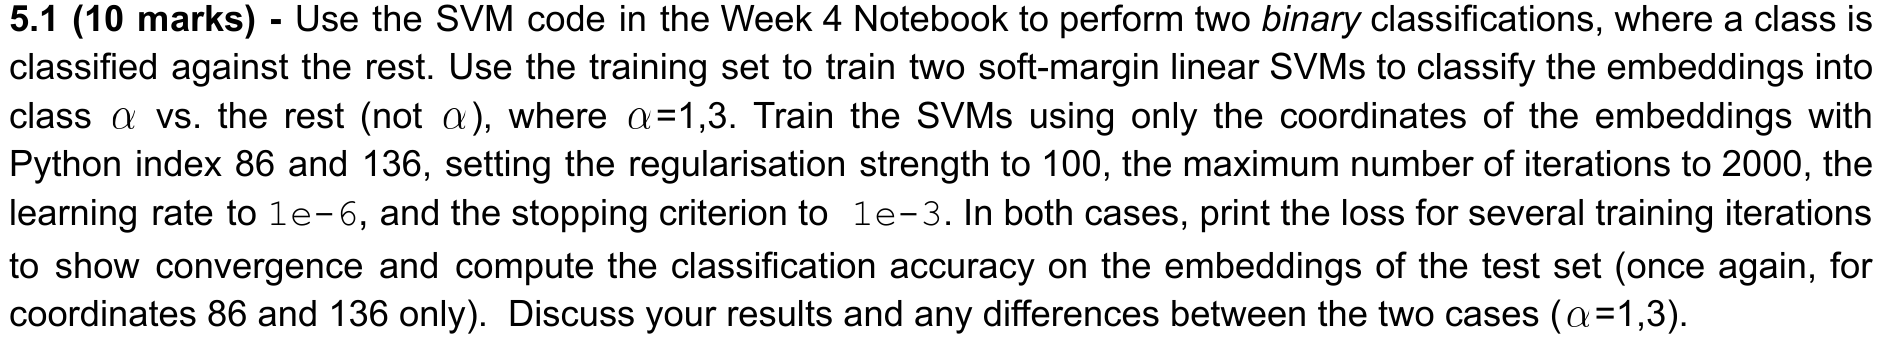

<a name="task-52"></a>

### **5.2 (5 marks, 3rd-year students only)**   [(index)](#index-task-52)


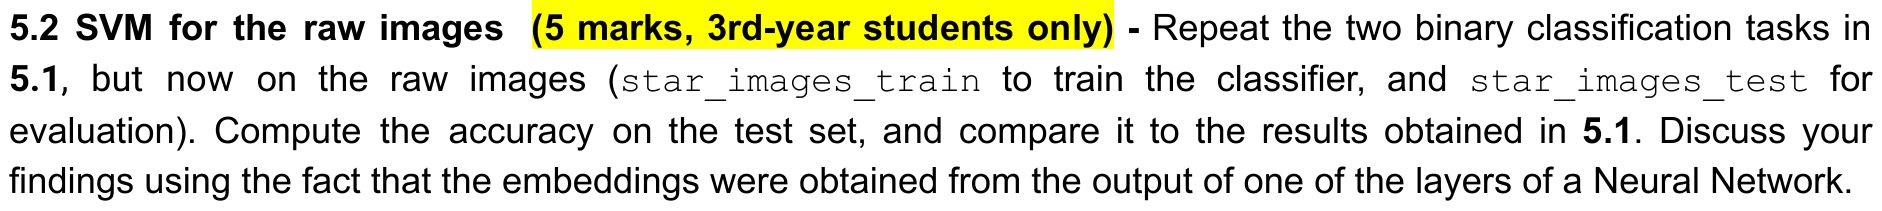

<a name="task-52m"></a>

### **5.2 (5 marks, MSc/4th-year students only)**   [(index)](#index-task-52m)

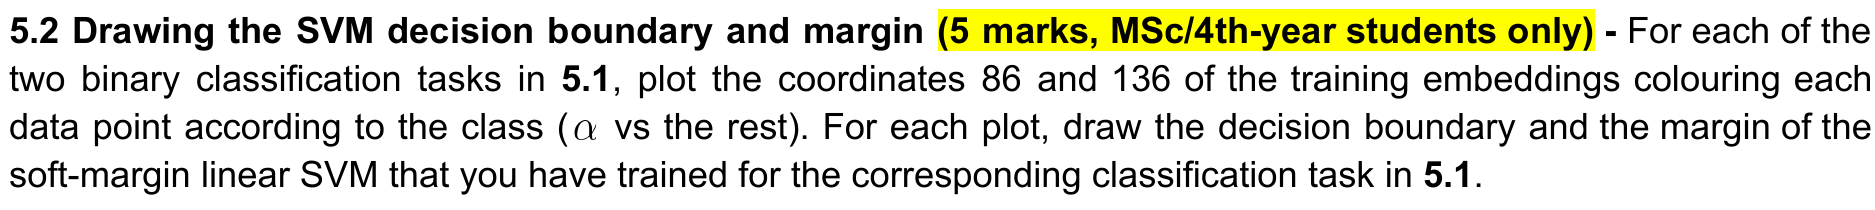